In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve,SCORERS
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from modules.LR import LR
import os

In [2]:
def svm_cross_validate(X,y):
    cv2 = cross_validate(estimator=SVC(kernel='rbf'),X=X,y=y,cv=5,scoring=['accuracy','precision_macro','recall_macro','f1_macro'],return_estimator=True,)
    result ={}
    result['accuracy'] = cv2['test_accuracy'].mean()
    result['precision'] = cv2['test_precision_macro'].mean()
    result['recall'] = cv2['test_recall_macro'].mean()
    result['f1'] = cv2['test_f1_macro'].mean()
    return result

In [3]:
def get_metrics(X,y):
    result = []
    LogisticRegression = LR()
    result.append(LogisticRegression.cross_valid(X,y))
    result.append(svm_cross_validate(X,y))
    return pd.DataFrame(result, index=['LR','SVM'])
    

# Glioblastoma vs Astrocytoma vs Oligodendroglioma

In [4]:
#Make output Directory
os.system("mkdir ./output/GvsAvsO")

mkdir: ./output/GvsAvsO: File exists


256

In [5]:
X = pd.read_csv("./output/data_preprocessing/GvsAvsO/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/GvsAvsO/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

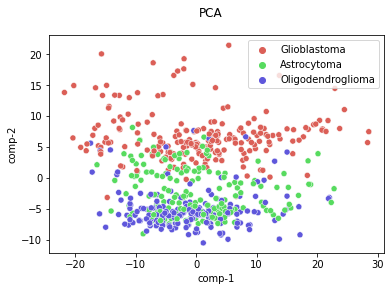

In [6]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",3 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/GvsAvsO/pca.png")

In [7]:
pca.explained_variance_ratio_.sum()

0.9005117420503447

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 575 samples in 0.000s...
[t-SNE] Computed neighbors for 575 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 575 / 575
[t-SNE] Mean sigma: 4.893109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.503693
[t-SNE] KL divergence after 1000 iterations: 0.737506


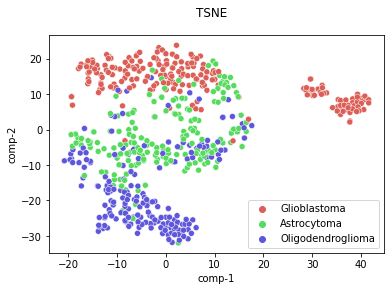

In [8]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",3 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/GvsAvsO/tsne.png")


In [9]:
X = X_pca
result = get_metrics(X,y)
result.to_csv("./output/GvsAvsO/metrics.txt")
result

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homeb

,accuracy,precision,recall,f1
LR,0.836522,0.667365,0.663256,0.663340
SVM,0.862609,0.871684,0.858155,0.856183


# Glioblastoma vs Astrocytoma vs Oligodendroglioma vs Normal

In [10]:
#Make output Directory
os.system("mkdir ./output/GvsAvsOvsN")

mkdir: ./output/GvsAvsOvsN: File exists


256

In [11]:
X = pd.read_csv("./output/data_preprocessing/GvsAvsOvsN/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/GvsAvsOvsN/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

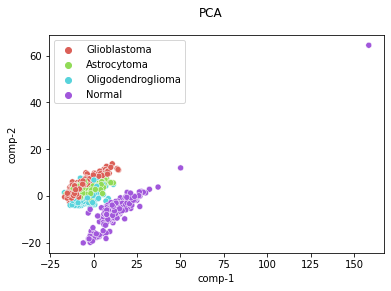

In [12]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",4 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/GvsAvsOvsN/pca.png")

In [13]:
pca.explained_variance_ratio_.sum()

0.9361462773086825

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 775 samples in 0.000s...
[t-SNE] Computed neighbors for 775 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 775 / 775
[t-SNE] Mean sigma: 3.946486
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.063046
[t-SNE] KL divergence after 1000 iterations: 0.683849


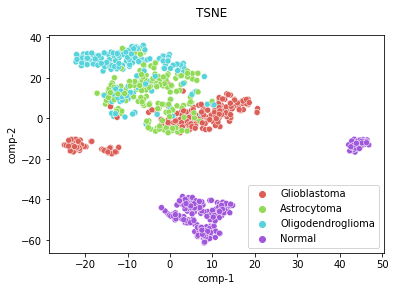

In [14]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",4 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/GvsAvsOvsN/tsne.png")


In [15]:
X = X_pca
result = get_metrics(X,y)
result.to_csv("./output/GvsAvsOvsN/metrics.txt")
result

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homeb

,accuracy,precision,recall,f1
LR,0.840000,0.607984,0.586943,0.594517
SVM,0.892903,0.901979,0.888706,0.887725


# Glioblastoma vs (A+O) vs Normal

In [16]:
#Make output Directory
os.system("mkdir ./output/GvsAOvsN")

mkdir: ./output/GvsAOvsN: File exists


256

In [17]:
X = pd.read_csv("./output/data_preprocessing/GvsAOvsN/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/GvsAOvsN/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

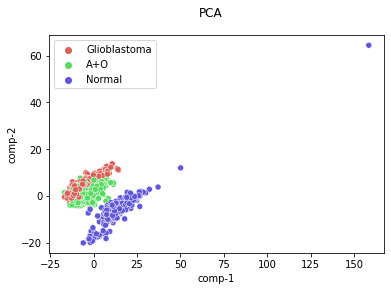

In [18]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",3 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/GvsAOvsN/pca.png")

In [19]:
pca.explained_variance_ratio_.sum()

0.9361869472480755

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 775 samples in 0.000s...
[t-SNE] Computed neighbors for 775 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 775 / 775
[t-SNE] Mean sigma: 3.949395
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.263107
[t-SNE] KL divergence after 1000 iterations: 0.677253


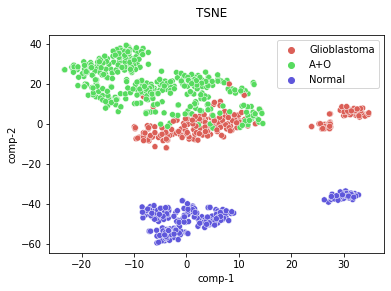

In [20]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",3 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/GvsAvsOvsN/tsne.png")

In [21]:
X = X_pca
result = get_metrics(X,y)
result.to_csv("./output/GvsAOvsN/metrics.txt")
result

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homeb

,accuracy,precision,recall,f1
LR,0.934194,0.682705,0.659066,0.669778
SVM,0.966452,0.967498,0.967243,0.966900


# All vs Normal

In [22]:
#Make output Directory
os.system("mkdir ./output/GvsN")

mkdir: ./output/GvsN: File exists


256

In [23]:
X = pd.read_csv("./output/data_preprocessing/GvsN/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/GvsN/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

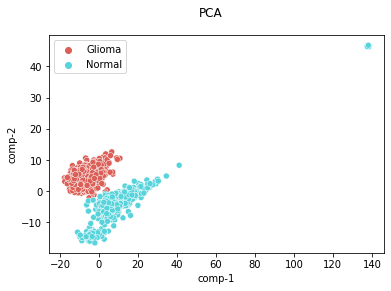

In [24]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/GvsN/pca.png")

In [25]:
pca.explained_variance_ratio_.sum()

0.9484907650787199

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1075 samples in 0.000s...
[t-SNE] Computed neighbors for 1075 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1075
[t-SNE] Computed conditional probabilities for sample 1075 / 1075
[t-SNE] Mean sigma: 3.388405
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.827049
[t-SNE] KL divergence after 1000 iterations: 0.730538


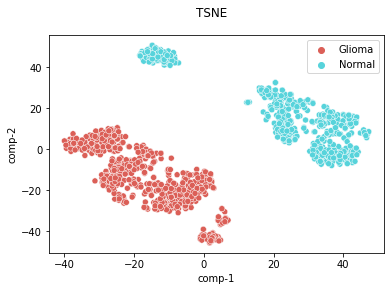

In [26]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/GvsN/tsne.png")

In [27]:
X = X_pca
result = get_metrics(X,y)
result.to_csv("./output/GvsN/metrics.txt")
result

,accuracy,precision,recall,f1
LR,1.0,1.0,1.0,1.0
SVM,1.0,1.0,1.0,1.0


# A vs O

In [28]:
#Make output Directory
os.system("mkdir ./output/AvsO")

mkdir: ./output/AvsO: File exists


256

In [29]:
X = pd.read_csv("./output/data_preprocessing/AvsO/X.txt",index_col=0)
y = pd.read_csv("./output/data_preprocessing/AvsO/y.txt",index_col=0)
X = X.loc[y['File Name']] #To make sure order of label and data is correct
y = y['labelf']

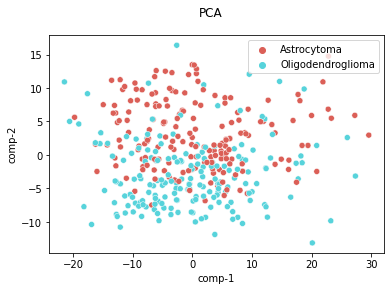

In [30]:
#Standard Scaler for better performance of PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_sc)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_pca[:,0]
df["comp-2"] = X_pca[:,1]

pca_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
pca_plot.figure.suptitle("PCA")
pca_plot.figure.savefig("./output/AvsO/pca.png")

In [31]:
pca.explained_variance_ratio_.sum()

0.9054289063838263

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 366 samples in 0.000s...
[t-SNE] Computed neighbors for 366 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 366 / 366
[t-SNE] Mean sigma: 5.586742
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.221115
[t-SNE] KL divergence after 1000 iterations: 0.739322


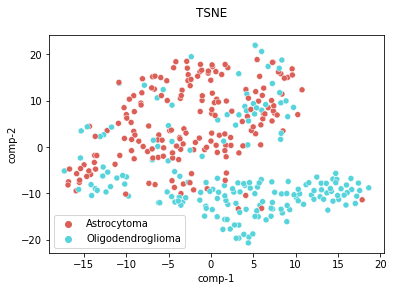

In [32]:
#TSNE -> peformed on PCA Dataset
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_pca)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
tsne_plot = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls",2 ),
                data=df)
tsne_plot.figure.suptitle("TSNE")
tsne_plot.figure.savefig("./output/AvsO/tsne.png")

In [33]:
X = X_pca
result = get_metrics(X,y)
result.to_csv("./output/AvsO/metrics.txt")
result

,accuracy,precision,recall,f1
LR,0.770270,0.771554,0.768693,0.765395
SVM,0.819622,0.841926,0.820195,0.816629
